In [43]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import json
import plotly.express as px
from folium.plugins import HeatMap, MarkerCluster
import numpy as np
import folium
from folium import Marker,GeoJson,Choropleth, Circle
import math
#plt.figure(figsize=(15))
sns.set(rc={'figure.figsize':(15,15)})

In [2]:
fig_size = (750,750)

In [3]:
Directory  = 'F:/Deeplearning/Datathon-1.0'
data_dir = Directory+'/data'
cumu_dir = data_dir +'/Cumulative'
hos_dir = data_dir + '/Hospital'
dataset_dir = Directory+'/Visualizations/datasets'

In [4]:
try:
    with open(Directory + '/data/maps/hospital_map.json', 'r') as f:
        hospital_map = json.load(f)
except:
    print('Error')

In [5]:
hospital_map

{'Colombo': ['NIID',
  'NHSL',
  'LRH',
  'DMH',
  'TH Kalubowila',
  'Castle St TH',
  'Colombo East Base Hospital',
  'KDU Hospital',
  'S.J.Pura TH'],
 'Gampaha': ['TH Ragama', 'DGH Gampaha', 'DGH Negombo', 'Chest H. Welisara'],
 'Puttalam': ['G.H. Chilaw', 'B.H. Marawila'],
 'Kalutara': ['DGH Kaluthara'],
 'Anuradhapura': ['TH Apura'],
 'Kandy': ['NH Kandy', 'BH Theldeniya'],
 'Kurunegala': ['TH Kurun.'],
 'Polonnaruwa': ['DGH Polonwa', 'BH Welikanda'],
 'Jaffna': ['TH Jaffna'],
 'Ratnapura': ['TH Rathn.'],
 'Kegalle': [],
 'Moneragala': ['BH Monagala'],
 'Kalmunai': [],
 'Matale': [],
 'Galle': ['TH Karapitiya'],
 'Ampara': [],
 'Badulla': ['PGH Badulla'],
 'Matara': ['G.H. Matara', 'BH Tangalle'],
 'Batticoloa': ['TH Batti.'],
 'Hambantota': ['BH Hamthota'],
 'Vavunia': ['G.H. Vavunia'],
 'Trincomalee': [],
 'Nuwaraeliya': [],
 'Kilinochchi': [],
 'Mannar': [],
 'Mullativu': []}

## Sri Lankan Data

In [6]:
list_cumu_files = os.listdir(cumu_dir)

if('.ipynb_checkpoints' in list_cumu_files):
    list_cumu_files.remove('.ipynb_checkpoints')
    
list_cumu_files[:15]

['03-31cumu.csv',
 '04-01cumu.csv',
 '04-02cumu.csv',
 '04-03cumu.csv',
 '04-04cumu.csv',
 '04-05cumu.csv',
 '04-06cumu.csv',
 '04-07cumu.csv',
 '04-08cumu.csv',
 '04-09cumu.csv',
 '04-10cumu.csv',
 '04-11cumu.csv',
 '04-12cumu.csv',
 '04-13cumu.csv',
 '04-14cumu.csv']

In [7]:
len(list_cumu_files)

211

In [8]:
check_cumu = pd.read_csv(cumu_dir+'/03-31cumu.csv')
check_cumu

Unnamed: 0                    Hospital  SL_Total  Foreign_Total  Total
0            5                        NIID       499             74    573
1            6                        NHSL       138              7    145
2            7                   TH Ragama       140              3    143
3            8               TH Karapitiya       142             17    159
4           10                    TH Apura        56              2     58
5           12                   TH Kurun.       127              1    128
6           14                   TH Jaffna        34              1     35
7           16                    NH Kandy        74              6     80
8           18                 TH Battico.        27              0     27
9           20                 DGH Gampaha       133              4    137
10          22                 DGH Negombo       169             13    182
11          24                   TH Rathn.        92              0     92
12          26                 PGH Badulla        27              1     28
13          27                         LRH        30              0     30
14          28                         DMH         9              0      9
15          30                 DGH Polonwa        78              6     84
16          32               TH Kalubowila        20              0     20
17          34                Castle St TH        10              0     10
18          36                 BH Hamthota        67              1     68
19          38                 BH Monagala        26              0     26
20          40                BH Welikanda        35              1     36
21          42               DGH Kaluthara       117              0    117
22          44           Chest H. Welisara         7              0      7
23          46  Colombo East Base Hospital         1              0      1
24          49                 BH Homagama        65              1     66
25          51            Dr Neville F. Ho         7              0      7
26          53                 G.H. Chilaw       133              0    133
27          55                 G.H. Matara         5              1      6
28          57                KDU Hospital         1              0      1
29          59                G.H. Vavunia        19              0     19

In [9]:
columns_cumu=['Date']+list(hospital_map.keys())
cumulative_sl_df = pd.DataFrame(columns=columns_cumu)
cumulative_sl_df

Empty DataFrame
Columns: [Date, Colombo, Gampaha, Puttalam, Kalutara, Anuradhapura, Kandy, Kurunegala, Polonnaruwa, Jaffna, Ratnapura, Kegalle, Moneragala, Kalmunai, Matale, Galle, Ampara, Badulla, Matara, Batticoloa, Hambantota, Vavunia, Trincomalee, Nuwaraeliya, Kilinochchi, Mannar, Mullativu]
Index: []

[0 rows x 27 columns]

In [10]:
columns_cumu=['Date']+list(hospital_map.keys())
cumulative_fo_df = pd.DataFrame(columns=columns_cumu)
cumulative_fo_df

Empty DataFrame
Columns: [Date, Colombo, Gampaha, Puttalam, Kalutara, Anuradhapura, Kandy, Kurunegala, Polonnaruwa, Jaffna, Ratnapura, Kegalle, Moneragala, Kalmunai, Matale, Galle, Ampara, Badulla, Matara, Batticoloa, Hambantota, Vavunia, Trincomalee, Nuwaraeliya, Kilinochchi, Mannar, Mullativu]
Index: []

[0 rows x 27 columns]

In [11]:
columns_cumu=['Date']+list(hospital_map.keys())
cumulative_tot_df = pd.DataFrame(columns=columns_cumu)
cumulative_tot_df

Empty DataFrame
Columns: [Date, Colombo, Gampaha, Puttalam, Kalutara, Anuradhapura, Kandy, Kurunegala, Polonnaruwa, Jaffna, Ratnapura, Kegalle, Moneragala, Kalmunai, Matale, Galle, Ampara, Badulla, Matara, Batticoloa, Hambantota, Vavunia, Trincomalee, Nuwaraeliya, Kilinochchi, Mannar, Mullativu]
Index: []

[0 rows x 27 columns]

In [12]:
for filename in list_cumu_files:
    date = filename[:5]
    
    df = pd.read_csv(cumu_dir+'/'+filename)
    
    date_sl={}
    date_fo={}
    date_tot={}
    
    for district in hospital_map.keys():
        list_hospitals = hospital_map[district]
        
        sl = 0
        fo = 0
        tot = 0 
        
        for hospital in list_hospitals:
            row = df.loc[df.Hospital == hospital]
            #print(row)
            
            if (row.empty):
                #print(hospital)
                continue
            
            sl += int(row.at[row.index[0], 'SL_Total'])
            fo += int(row.at[row.index[0], 'Foreign_Total'])
            tot += int(row.at[row.index[0], 'Total'])
        
        date_sl[district]=sl
        date_fo[district]=fo
        date_tot[district]=tot
    
    date_sl['Date']=date
    date_fo['Date']=date
    date_tot['Date']=date
    
    cumulative_sl_df = cumulative_sl_df.append(date_sl,ignore_index=True)
    cumulative_fo_df = cumulative_fo_df.append(date_fo,ignore_index=True)
    cumulative_tot_df = cumulative_tot_df.append(date_tot,ignore_index=True)
    #print("*** \n \n")

In [13]:
cumulative_sl_df.tail(10)

Date Colombo Gampaha Puttalam Kalutara Anuradhapura Kandy Kurunegala  \
201  10-23    8797    3811     3173      768         1274   281        800   
202  10-24    9027    3869     3199      776         1287   281        809   
203  10-25    9245    3922     3226      779         1302   281        821   
204  10-26    9470    3974     3254      785         1310   281        832   
205  10-27    9636    4044     3285      791         1329   281        847   
206  10-28    9797    4118     3323      797         1337   283        862   
207  10-29    9863    4177     3335      803         1349   284        872   
208  10-30    9970    4218     3373      806         1365   285        883   
209  10-31   10122    4239     3398      816         1376   285        894   
210  11-01   10170    4278     3425      822         1388   285        904   

    Polonnaruwa Jaffna  ... Badulla Matara Batticoloa Hambantota Vavunia  \
201         696    200  ...     131    158        285        382     195   
202         699    206  ...     134    158        287        382     195   
203         702    207  ...     142    158        291        382     196   
204         707    207  ...     144    158        295        382     197   
205         714    210  ...     145    158        295        382     198   
206         724    212  ...     146    158        296        382     199   
207         726    212  ...     149    158        297        382     200   
208         726    217  ...     151    173        300        382     201   
209         730    220  ...     156    173        303        382     203   
210         732    223  ...     160    180        306        382     203   

    Trincomalee Nuwaraeliya Kilinochchi Mannar Mullativu  
201           0           0           0      0         0  
202           0           0           0      0         0  
203           0           0           0      0         0  
204           0           0           0      0         0  
205           0           0           0      0         0  
206           0           0           0      0         0  
207           0           0           0      0         0  
208           0           0           0      0         0  
209           0           0           0      0         0  
210           0           0           0      0         0  

[10 rows x 27 columns]

In [14]:
total_df = cumulative_sl_df.loc[cumulative_sl_df.Date == '11-01'].T
total_df = total_df.drop('Date',axis=0)
total_df.sum()

210    24689.0
dtype: float64

In [15]:
column_show = list(hospital_map.keys())
column_show.remove('Kandy')
column_show.remove('Matara')

In [16]:
cumulative_sl_df.tail(20).style.background_gradient(cmap='Reds',subset=["Colombo"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Gampaha"])\
                        .background_gradient(cmap='Greens',subset=["Puttalam"])\
                        .background_gradient(cmap='Purples',subset=["Kalutara"])\
                        .background_gradient(cmap='Blues',subset=["Anuradhapura"])\
                        .background_gradient(cmap='Oranges',subset=["Kurunegala"])\
                        .background_gradient(cmap='Greys',subset=["Polonnaruwa"])                        

<AxesSubplot:xlabel='Date', ylabel='Cumulative Patients'>

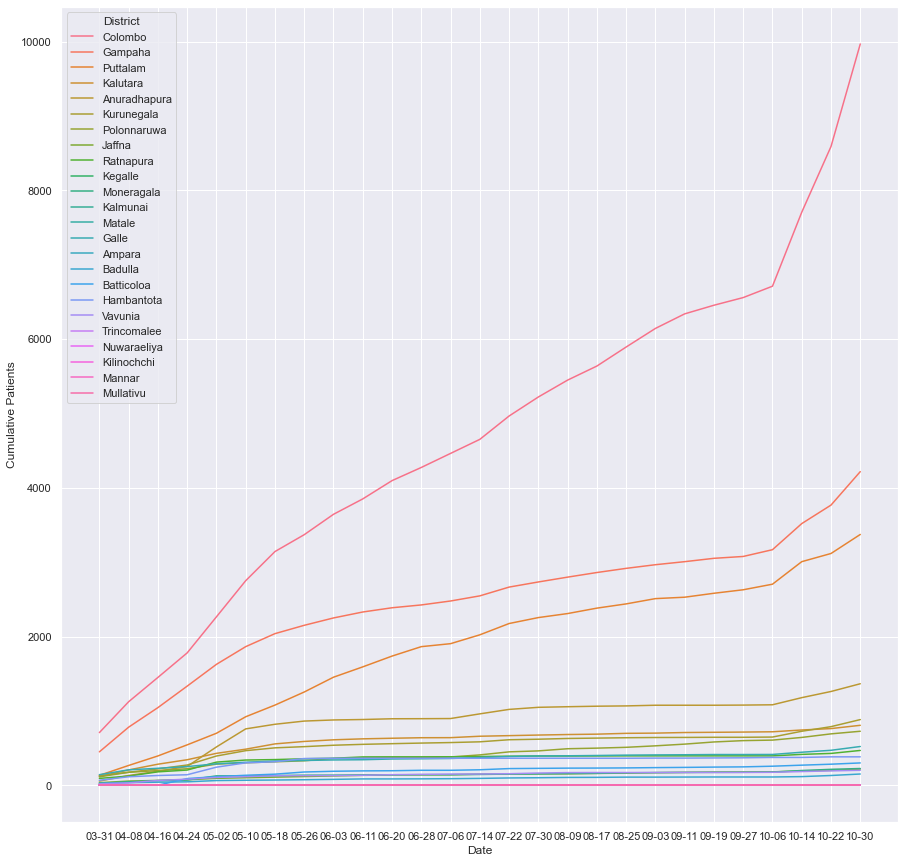

In [17]:
cumulative_sl_df = cumulative_sl_df.apply(lambda x: x.apply(int) if x.name in list(hospital_map.keys()) else x)
sns.lineplot(x='Date', y='Cumulative Patients', hue='District', 
             data=pd.melt(cumulative_sl_df.loc[cumulative_sl_df.index%8==0],var_name='District',value_name='Cumulative Patients', id_vars = ['Date'],value_vars=column_show))

In [18]:
cumulative_sl_df.to_csv(dataset_dir+'/cumulative_sl.csv')
cumulative_fo_df.to_csv(dataset_dir+'/cumulative_fo.csv')
cumulative_tot_df.to_csv(dataset_dir+'/cumulative_tot.csv')

<AxesSubplot:xlabel='Date', ylabel='Cumulative Patients'>

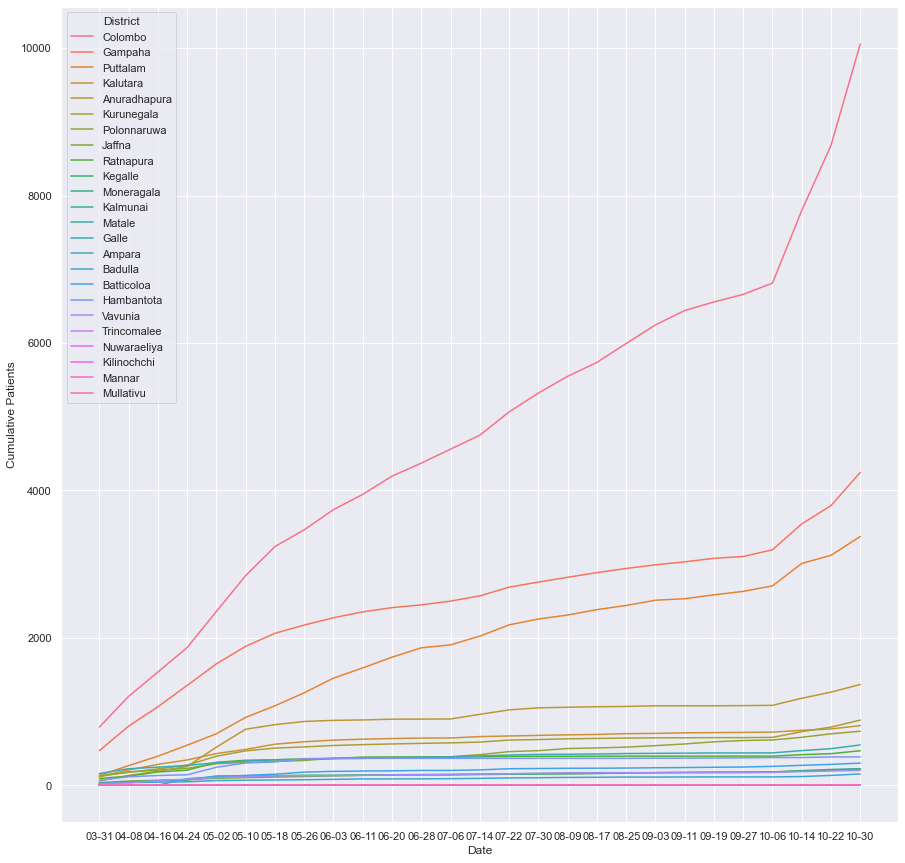

In [19]:
cumulative_tot_df = cumulative_tot_df.apply(lambda x: x.apply(int) if x.name in list(hospital_map.keys()) else x)
sns.lineplot(x='Date', y='Cumulative Patients', hue='District', 
             data=pd.melt(cumulative_tot_df.loc[cumulative_tot_df.index%8==0],var_name='District',value_name='Cumulative Patients', id_vars = ['Date'],value_vars=column_show))

In [20]:
list_hos_files = os.listdir(hos_dir)

if('.ipynb_checkpoints' in list_hos_files):
    list_hos_files.remove('.ipynb_checkpoints')
    
list_hos_files[:15]

['03-31hos.csv',
 '04-01hos.csv',
 '04-02hos.csv',
 '04-03hos.csv',
 '04-04hos.csv',
 '04-05hos.csv',
 '04-06hos.csv',
 '04-07hos.csv',
 '04-08hos.csv',
 '04-09hos.csv',
 '04-10hos.csv',
 '04-11hos.csv',
 '04-12hos.csv',
 '04-13hos.csv',
 '04-14hos.csv']

In [21]:
check_hos = pd.read_csv(hos_dir+'/03-31hos.csv')
check_hos

Unnamed: 0                    Hospital  SL_Today  Foreign_Today  \
0            5                        NIID         4              0   
1            6                        NHSL         5              0   
2            7                   TH Ragama         9              1   
3            8               TH Karapitiya         0              0   
4           10                    TH Apura         2              0   
5           12                   TH Kurun.         1              0   
6           14                   TH Jaffna         8              0   
7           16                    NH Kandy         7              0   
8           18                 TH Battico.         1              0   
9           20                 DGH Gampaha        11              0   
10          22                 DGH Negombo        18              0   
11          24                   TH Rathn.         7              0   
12          26                 PGH Badulla         1              0   
13          27                         LRH         1              0   
14          28                         DMH         0              0   
15          30                 DGH Polonwa         5              0   
16          32               TH Kalubowila         0              0   
17          34                Castle St TH         1              0   
18          36                 BH Hamthota         5              0   
19          38                 BH Monagala         1              0   
20          40                BH Welikanda        18              1   
21          42               DGH Kaluthara         5              0   
22          44           Chest H. Welisara         3              0   
23          46  Colombo East Base Hospital         0              0   
24          49                 BH Homagama        48              1   
25          51            Dr Neville F. Ho         2              0   
26          53                 G.H. Chilaw         1              0   
27          55                 G.H. Matara         2              0   
28          57                KDU Hospital         1              0   
29          59                G.H. Vavunia         3              0   
30          61                       Total       170              3   

   Total_Today  
0            4  
1            5  
2           10  
3            0  
4            2  
5            1  
6            8  
7            7  
8            1  
9           11  
10          18  
11           7  
12           1  
13           1  
14           0  
15           5  
16           0  
17           1  
18           5  
19           1  
20          19  
21           5  
22           3  
23           0  
24          49  
25           2  
26           1  
27           2  
28           1  
29           3  
30        173#

In [22]:
columns_day=['Date']+list(hospital_map.keys())
day_sl_df = pd.DataFrame(columns=columns_cumu)
day_sl_df

Empty DataFrame
Columns: [Date, Colombo, Gampaha, Puttalam, Kalutara, Anuradhapura, Kandy, Kurunegala, Polonnaruwa, Jaffna, Ratnapura, Kegalle, Moneragala, Kalmunai, Matale, Galle, Ampara, Badulla, Matara, Batticoloa, Hambantota, Vavunia, Trincomalee, Nuwaraeliya, Kilinochchi, Mannar, Mullativu]
Index: []

[0 rows x 27 columns]

In [23]:
columns_day=['Date']+list(hospital_map.keys())
day_fo_df = pd.DataFrame(columns=columns_cumu)
day_fo_df

Empty DataFrame
Columns: [Date, Colombo, Gampaha, Puttalam, Kalutara, Anuradhapura, Kandy, Kurunegala, Polonnaruwa, Jaffna, Ratnapura, Kegalle, Moneragala, Kalmunai, Matale, Galle, Ampara, Badulla, Matara, Batticoloa, Hambantota, Vavunia, Trincomalee, Nuwaraeliya, Kilinochchi, Mannar, Mullativu]
Index: []

[0 rows x 27 columns]

In [24]:
columns_day=['Date']+list(hospital_map.keys())
day_tot_df = pd.DataFrame(columns=columns_cumu)
day_tot_df

Empty DataFrame
Columns: [Date, Colombo, Gampaha, Puttalam, Kalutara, Anuradhapura, Kandy, Kurunegala, Polonnaruwa, Jaffna, Ratnapura, Kegalle, Moneragala, Kalmunai, Matale, Galle, Ampara, Badulla, Matara, Batticoloa, Hambantota, Vavunia, Trincomalee, Nuwaraeliya, Kilinochchi, Mannar, Mullativu]
Index: []

[0 rows x 27 columns]

In [25]:
for filename in list_hos_files:
    date = filename[:5]
    
    df = pd.read_csv(hos_dir+'/'+filename)
    
    date_sl={}
    date_fo={}
    date_tot={}
    
    for district in hospital_map.keys():
        list_hospitals = hospital_map[district]
        
        sl = 0
        fo = 0
        tot = 0
        
        for hospital in list_hospitals:
            row = df.loc[df.Hospital == hospital]
            #print(row)
            
            if (row.empty):
                #print(hospital)
                continue
            
            sl += int(row.at[row.index[0], 'SL_Today'])
            fo += int(row.at[row.index[0], 'Foreign_Today'])
            tot += int(row.at[row.index[0], 'Total_Today'])
        
        date_sl[district]=sl
        date_fo[district]=fo
        date_tot[district]=tot
    
    date_sl['Date']=date
    date_fo['Date']=date
    date_tot['Date']=date
    
    day_sl_df = day_sl_df.append(date_sl,ignore_index=True)
    day_fo_df = day_fo_df.append(date_fo,ignore_index=True)
    day_tot_df = day_tot_df.append(date_tot,ignore_index=True)
    #print("*** \n \n")

In [26]:
day_sl_df.tail(10)

Date Colombo Gampaha Puttalam Kalutara Anuradhapura Kandy Kurunegala  \
201  10-23     281      60       20        6            9    10         15   
202  10-24     303      79       14       18           14     9         13   
203  10-25     342      74       17       17           14     9         13   
204  10-26     358      70       13       18            3     9         17   
205  10-27     251      84       17       15           14     9         21   
206  10-28     242      92       20       15            6    11         15   
207  10-29     232     101       25       14            8    12         13   
208  10-30     200     120       27       10           16    12         12   
209  10-31     175     114       24       18           12     9         11   
210  11-01     191      98       25       17           14     9         10   

    Polonnaruwa Jaffna  ... Badulla Matara Batticoloa Hambantota Vavunia  \
201           9      0  ...       3      0          1          0       2   
202           9      6  ...       4      0          1          0       2   
203           8      1  ...      10      0          3          0       3   
204           8      2  ...       4      0          5          1       1   
205          10      3  ...       3      0          4          0       1   
206          16      2  ...       1      0          2          0       0   
207           8      0  ...       5      0          2          0       0   
208           6      5  ...       6      2          4          0       1   
209           8      3  ...       5      2          2          0       2   
210           8      3  ...       7      4          7          0       1   

    Trincomalee Nuwaraeliya Kilinochchi Mannar Mullativu  
201           0           0           0      0         0  
202           0           0           0      0         0  
203           0           0           0      0         0  
204           0           0           0      0         0  
205           0           0           0      0         0  
206           0           0           0      0         0  
207           0           0           0      0         0  
208           0           0           0      0         0  
209           0           0           0      0         0  
210           0           0           0      0         0  

[10 rows x 27 columns]

In [27]:
day_sl_df.tail(20).style.background_gradient(cmap='Reds',subset=["Colombo"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Gampaha"])\
                        .background_gradient(cmap='Greens',subset=["Puttalam"])\
                        .background_gradient(cmap='Purples',subset=["Kalutara"])\
                        .background_gradient(cmap='Blues',subset=["Anuradhapura"])\
                        .background_gradient(cmap='Oranges',subset=["Kurunegala"])\
                        .background_gradient(cmap='Greys',subset=["Polonnaruwa"])

<AxesSubplot:xlabel='Date', ylabel='Suspected Patients'>

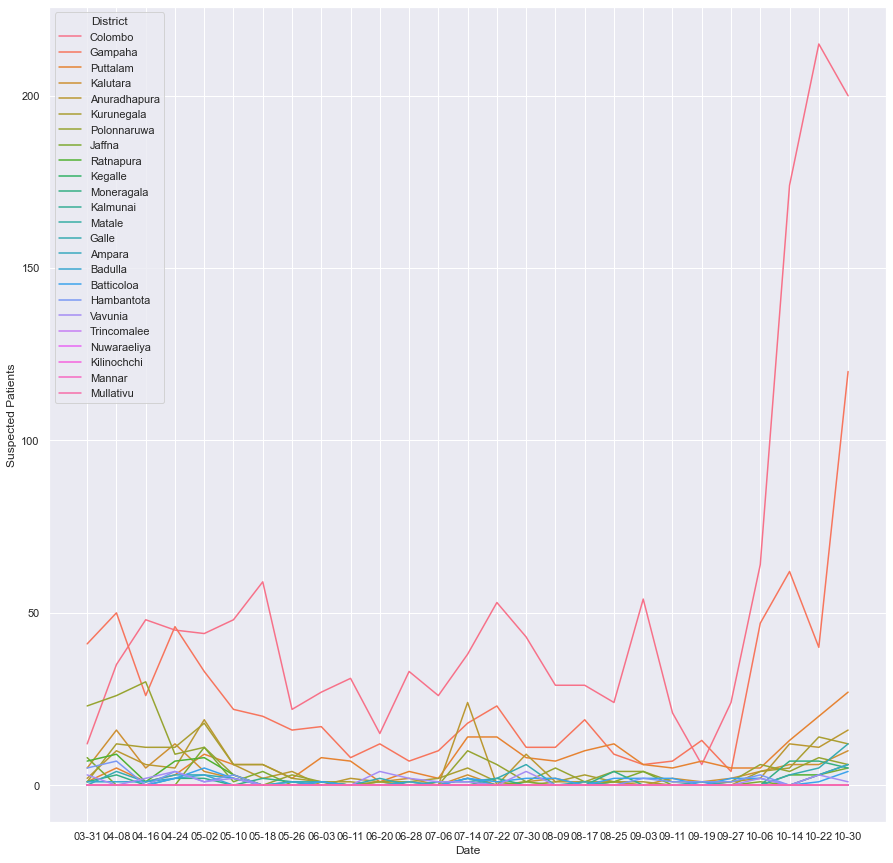

In [28]:
day_sl_df = day_sl_df.apply(lambda x: x.apply(int) if x.name in list(hospital_map.keys()) else x)
sns.lineplot(x='Date', y='Suspected Patients', hue='District', 
             data=pd.melt(day_sl_df.loc[day_sl_df.index%8==0],var_name='District',value_name='Suspected Patients', id_vars = ['Date'],value_vars=column_show))

<AxesSubplot:xlabel='Date', ylabel='Suspected Patients'>

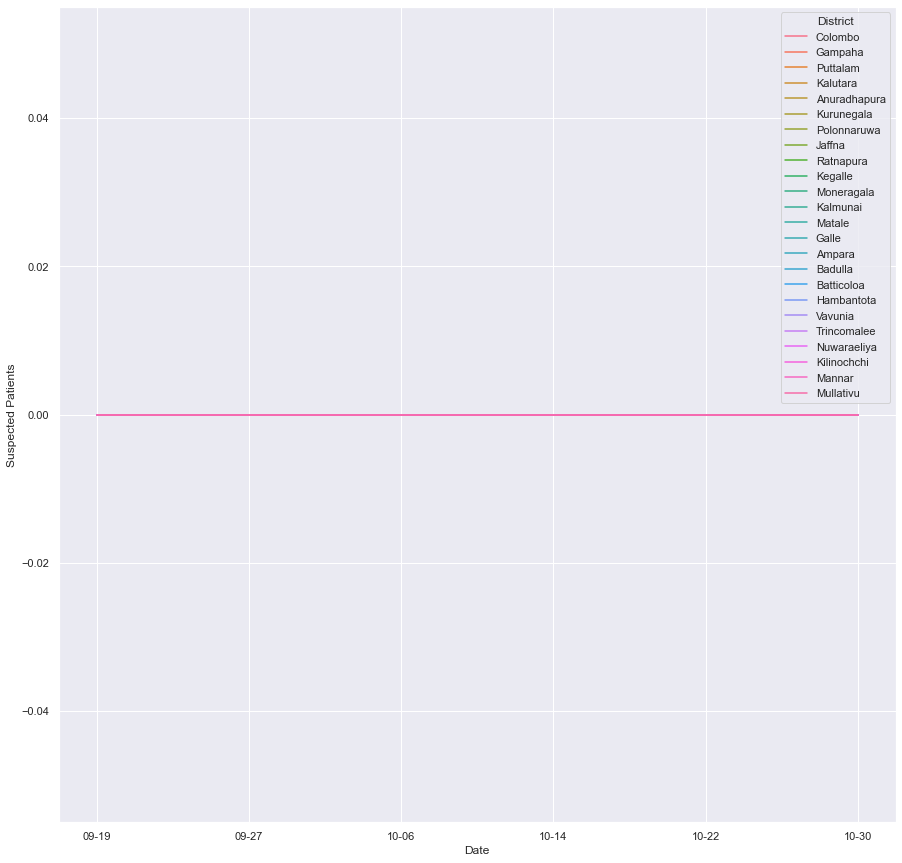

In [29]:
day_fo_df = day_fo_df.apply(lambda x: x.apply(int) if x.name in list(hospital_map.keys()) else x)
sns.lineplot(x='Date', y='Suspected Patients', hue='District', 
             data=pd.melt(day_fo_df.tail(50).loc[day_fo_df.tail(50).index%8==0],var_name='District',value_name='Suspected Patients', id_vars = ['Date'],value_vars=column_show))

<AxesSubplot:xlabel='Date', ylabel='Suspected Patients'>

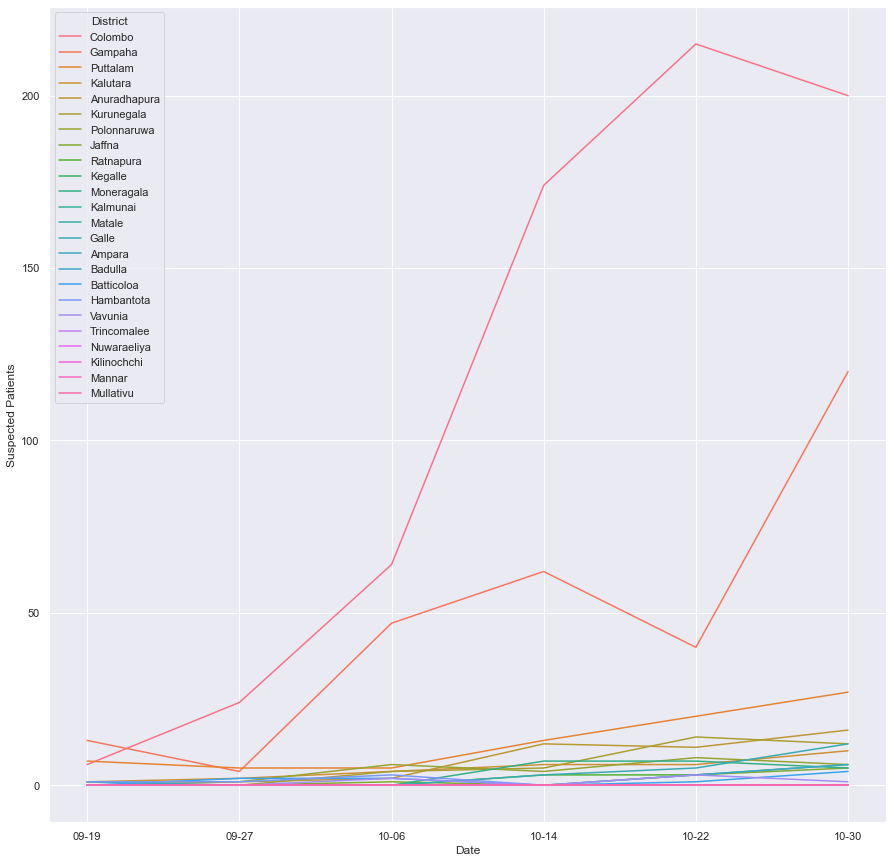

In [30]:
day_tot_df = day_tot_df.apply(lambda x: x.apply(int) if x.name in list(hospital_map.keys()) else x)
sns.lineplot(x='Date', y='Suspected Patients', hue='District', 
             data=pd.melt(day_tot_df.tail(50).loc[day_tot_df.tail(50).index%8==0],var_name='District',value_name='Suspected Patients', id_vars = ['Date'],value_vars=column_show))

In [31]:
day_sl_df.to_csv(dataset_dir+'/day_sl.csv')
day_fo_df.to_csv(dataset_dir+'/day_fo.csv')
day_tot_df.to_csv(dataset_dir+'/day_tot.csv')

In [32]:
[column_val] = day_tot_df.tail(1).index
pie_df = day_tot_df.tail(1).T
#print(pie_df)
pie_df['Total'] = pie_df.loc[:,column_val]
pie_df = pie_df.drop(column_val,axis=1)
pie_df = pie_df.drop('Date',axis=0)
pie_df

Total
Colombo        191
Gampaha         98
Puttalam        25
Kalutara        17
Anuradhapura    14
Kandy            9
Kurunegala      10
Polonnaruwa      8
Jaffna           3
Ratnapura        0
Kegalle          0
Moneragala       7
Kalmunai         0
Matale           0
Galle            4
Ampara           0
Badulla          7
Matara           4
Batticoloa       7
Hambantota       0
Vavunia          1
Trincomalee      0
Nuwaraeliya      0
Kilinochchi      0
Mannar           0
Mullativu        0

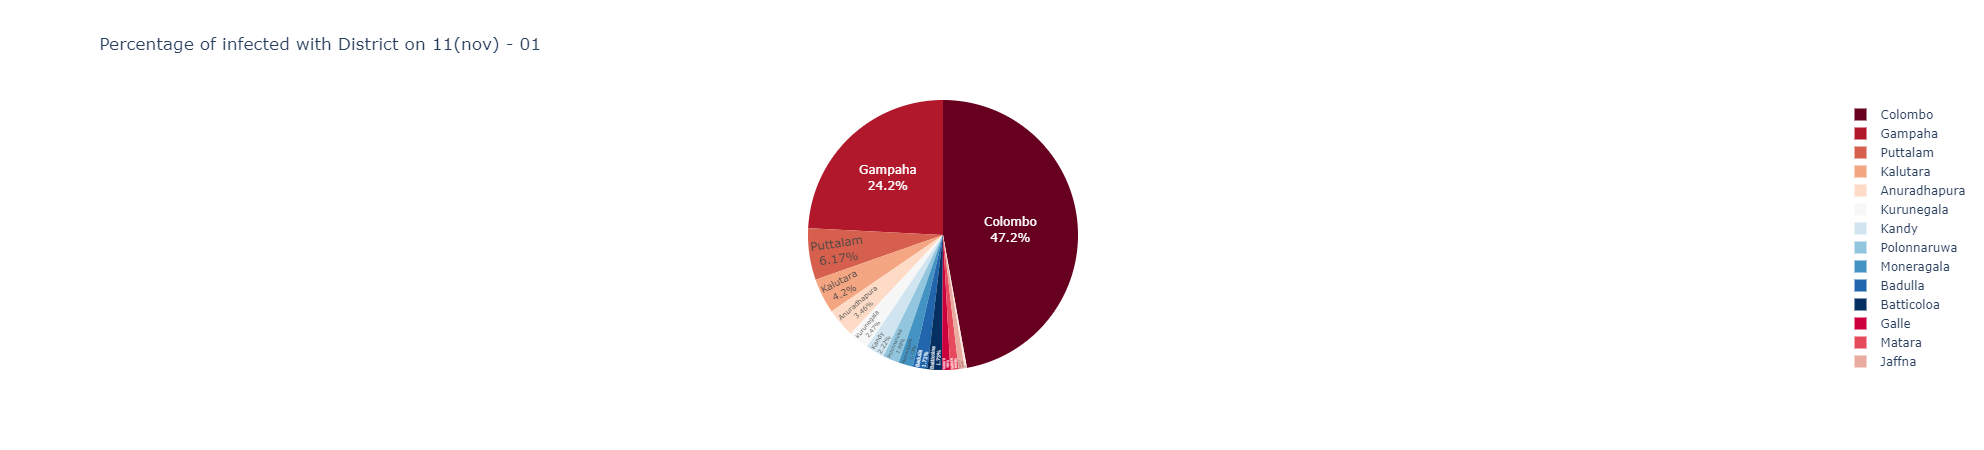

In [33]:
fig = px.pie(pie_df, values= 'Total', names = pie_df.index, title = 'Percentage of infected with District on 11(nov) - 01',
                         color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [34]:
[column_val] = cumulative_tot_df.tail(1).index
pie_df_1 = cumulative_tot_df.tail(1).T
#print(pie_df)
pie_df_1['Total'] = pie_df_1.loc[:,column_val]
pie_df_1 = pie_df_1.drop(column_val,axis=1)
pie_df_1 = pie_df_1.drop('Date',axis=0)
pie_df_1

Total
Colombo       10258
Gampaha        4304
Puttalam       3427
Kalutara        824
Anuradhapura   1390
Kandy           291
Kurunegala      905
Polonnaruwa     739
Jaffna          225
Ratnapura       468
Kegalle           0
Moneragala      233
Kalmunai          0
Matale            0
Galle           556
Ampara            0
Badulla         162
Matara          182
Batticoloa      306
Hambantota      384
Vavunia         203
Trincomalee       0
Nuwaraeliya       0
Kilinochchi       0
Mannar            0
Mullativu         0

In [35]:
pie_df_1.index

Index(['Colombo', 'Gampaha', 'Puttalam', 'Kalutara', 'Anuradhapura', 'Kandy',
       'Kurunegala', 'Polonnaruwa', 'Jaffna', 'Ratnapura', 'Kegalle',
       'Moneragala', 'Kalmunai', 'Matale', 'Galle', 'Ampara', 'Badulla',
       'Matara', 'Batticoloa', 'Hambantota', 'Vavunia', 'Trincomalee',
       'Nuwaraeliya', 'Kilinochchi', 'Mannar', 'Mullativu'],
      dtype='object')

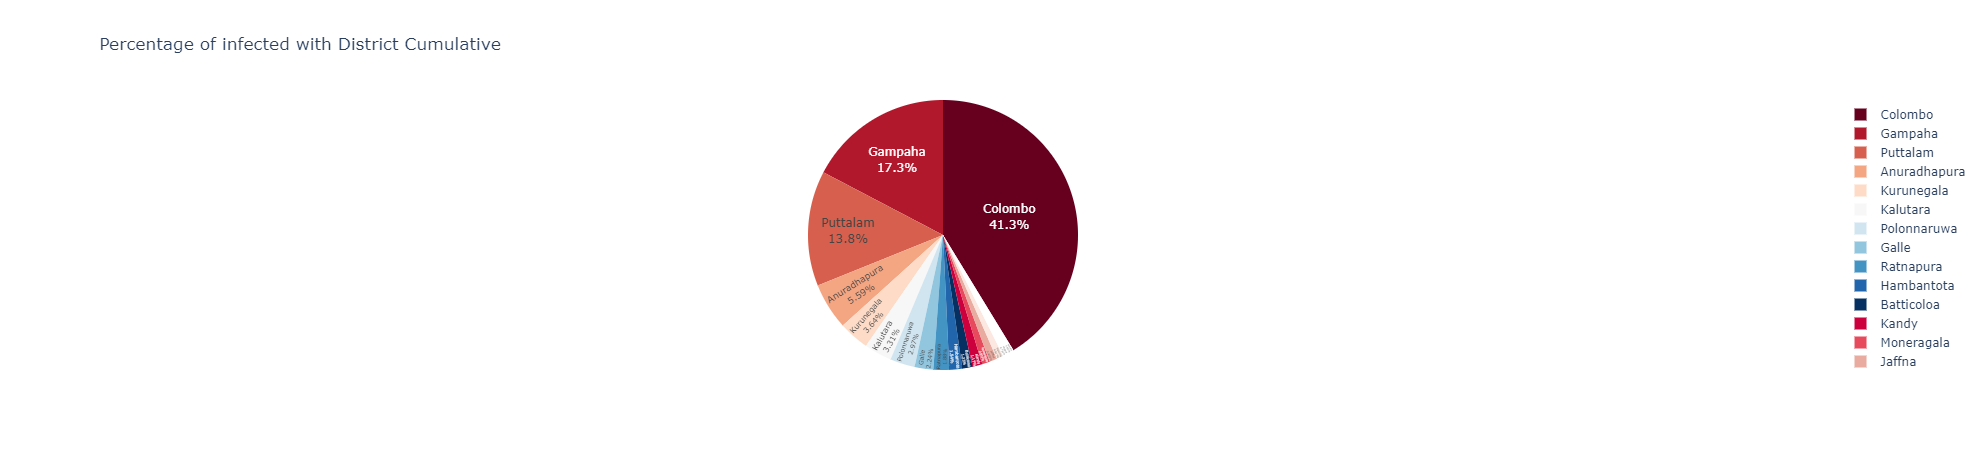

In [36]:
fig = px.pie(pie_df_1, values= 'Total', names = pie_df_1.index, title = 'Percentage of infected with District Cumulative',
                         color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [37]:
location_df = pd.read_csv(dataset_dir+'/Location.csv')
location_df

District      Long        Lat
0        Colombo  6.907557  79.860266
1        Gampaha  7.133940  80.022504
2       Puttalam  7.938736  79.942281
3       Kalutara  6.581715  80.135822
4   Anuradhapura  8.321418  80.394877
5          Kandy  7.299622  80.648246
6     Kurunegala  7.659964  80.257308
7    Polonnaruwa  7.994924  81.035596
8         Jaffna  9.738581  80.081293
9      Ratnapura  6.564179  80.563616
10       Kegalle  7.115695  80.325754
11    Moneragala  6.724356  81.353858
12      Kalmunai  7.418797  81.831287
13        Matale  7.643962  80.695727
14         Galle  6.217619  80.245742
15        Ampara  7.121484  81.737674
16       Badulla  6.989010  81.058134
17        Matara  6.128160  80.549586
18    Batticoloa  7.802206  81.462288
19    Hambantota  6.230570  81.166867
20       Vavunia  8.746393  80.482031
21   Trincomalee  8.466183  81.074024
22   Nuwaraeliya  6.949846  80.784117
23   Kilinochchi  9.383391  80.309952
24        Mannar  8.830335  80.098404
25     Mullativu  9.254172  80.625636

In [38]:
#location_df.insert(3,'Total',None)
location_df

District      Long        Lat
0        Colombo  6.907557  79.860266
1        Gampaha  7.133940  80.022504
2       Puttalam  7.938736  79.942281
3       Kalutara  6.581715  80.135822
4   Anuradhapura  8.321418  80.394877
5          Kandy  7.299622  80.648246
6     Kurunegala  7.659964  80.257308
7    Polonnaruwa  7.994924  81.035596
8         Jaffna  9.738581  80.081293
9      Ratnapura  6.564179  80.563616
10       Kegalle  7.115695  80.325754
11    Moneragala  6.724356  81.353858
12      Kalmunai  7.418797  81.831287
13        Matale  7.643962  80.695727
14         Galle  6.217619  80.245742
15        Ampara  7.121484  81.737674
16       Badulla  6.989010  81.058134
17        Matara  6.128160  80.549586
18    Batticoloa  7.802206  81.462288
19    Hambantota  6.230570  81.166867
20       Vavunia  8.746393  80.482031
21   Trincomalee  8.466183  81.074024
22   Nuwaraeliya  6.949846  80.784117
23   Kilinochchi  9.383391  80.309952
24        Mannar  8.830335  80.098404
25     Mullativu  9.254172  80.625636

In [39]:
for index in location_df.index:
    district = location_df.at[index,'District']
    location_df.at[index,'Total'] = pie_df.at[district,'Total']

location_df

District      Long        Lat  Total
0        Colombo  6.907557  79.860266  191.0
1        Gampaha  7.133940  80.022504   98.0
2       Puttalam  7.938736  79.942281   25.0
3       Kalutara  6.581715  80.135822   17.0
4   Anuradhapura  8.321418  80.394877   14.0
5          Kandy  7.299622  80.648246    9.0
6     Kurunegala  7.659964  80.257308   10.0
7    Polonnaruwa  7.994924  81.035596    8.0
8         Jaffna  9.738581  80.081293    3.0
9      Ratnapura  6.564179  80.563616    0.0
10       Kegalle  7.115695  80.325754    0.0
11    Moneragala  6.724356  81.353858    7.0
12      Kalmunai  7.418797  81.831287    0.0
13        Matale  7.643962  80.695727    0.0
14         Galle  6.217619  80.245742    4.0
15        Ampara  7.121484  81.737674    0.0
16       Badulla  6.989010  81.058134    7.0
17        Matara  6.128160  80.549586    4.0
18    Batticoloa  7.802206  81.462288    7.0
19    Hambantota  6.230570  81.166867    0.0
20       Vavunia  8.746393  80.482031    1.0
21   Trincomalee  8.466183  81.074024    0.0
22   Nuwaraeliya  6.949846  80.784117    0.0
23   Kilinochchi  9.383391  80.309952    0.0
24        Mannar  8.830335  80.098404    0.0
25     Mullativu  9.254172  80.625636    0.0

In [40]:
def rounding(x):
    return(round(x,4))

In [41]:
location_df = location_df.apply(lambda x: x.apply(float) if x.name != 'District' else x)
location_df = location_df.apply(lambda x: x.apply(str) if x.name == 'Total' else x)
#location_df = location_df.apply(lambda x: x.apply(rounding) if x.name in ['Long','Lat'] else x)
location_df

District      Long        Lat  Total
0        Colombo  6.907557  79.860266  191.0
1        Gampaha  7.133940  80.022504   98.0
2       Puttalam  7.938736  79.942281   25.0
3       Kalutara  6.581715  80.135822   17.0
4   Anuradhapura  8.321418  80.394877   14.0
5          Kandy  7.299622  80.648246    9.0
6     Kurunegala  7.659964  80.257308   10.0
7    Polonnaruwa  7.994924  81.035596    8.0
8         Jaffna  9.738581  80.081293    3.0
9      Ratnapura  6.564179  80.563616    0.0
10       Kegalle  7.115695  80.325754    0.0
11    Moneragala  6.724356  81.353858    7.0
12      Kalmunai  7.418797  81.831287    0.0
13        Matale  7.643962  80.695727    0.0
14         Galle  6.217619  80.245742    4.0
15        Ampara  7.121484  81.737674    0.0
16       Badulla  6.989010  81.058134    7.0
17        Matara  6.128160  80.549586    4.0
18    Batticoloa  7.802206  81.462288    7.0
19    Hambantota  6.230570  81.166867    0.0
20       Vavunia  8.746393  80.482031    1.0
21   Trincomalee  8.466183  81.074024    0.0
22   Nuwaraeliya  6.949846  80.784117    0.0
23   Kilinochchi  9.383391  80.309952    0.0
24        Mannar  8.830335  80.098404    0.0
25     Mullativu  9.254172  80.625636    0.0

In [44]:
m = folium.Map(location=[7.8731, 80.7718], tiles='openstreetmap' ,zoom_start=8)

# Add points to the map
mc = MarkerCluster()
for index in location_df.index:
    if not math.isnan(location_df.at[index,'Long']) and not math.isnan(location_df.at[index,'Lat']):
        mc.add_child(Marker([location_df.at[index,'Long'], location_df.at[index,'Lat']]
                           ,popup=location_df.at[index,'Total']
                           ,icon=folium.Icon(color='red', icon='info-sign')))

m.add_child(mc)
# Display the map
m

## Global Data Used

In [45]:
corona_df = pd.read_csv(dataset_dir+'/corona.csv')
corona_df

iso_code continent     location        date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan  12/31/2019          NaN        0.0   
1          AFG      Asia  Afghanistan    1/1/2020          NaN        0.0   
2          AFG      Asia  Afghanistan    1/2/2020          NaN        0.0   
3          AFG      Asia  Afghanistan    1/3/2020          NaN        0.0   
4          AFG      Asia  Afghanistan    1/4/2020          NaN        0.0   
...        ...       ...          ...         ...          ...        ...   
16852      FJI   Oceania         Fiji   9/14/2020         32.0        0.0   
16853      FJI   Oceania         Fiji   9/15/2020         32.0        0.0   
16854      FJI   Oceania         Fiji   9/16/2020         32.0        0.0   
16855      FJI   Oceania         Fiji   9/17/2020         32.0        0.0   
16856      FJI   Oceania         Fiji   9/18/2020         32.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                     NaN           NaN         0.0                  NaN  ...   
1                     NaN           NaN         0.0                  NaN  ...   
2                     NaN           NaN         0.0                  NaN  ...   
3                     NaN           NaN         0.0                  NaN  ...   
4                     NaN           NaN         0.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
16852               0.143           2.0         0.0                  0.0  ...   
16853               0.143           2.0         0.0                  0.0  ...   
16854               0.143           2.0         0.0                  0.0  ...   
16855               0.000           2.0         0.0                  0.0  ...   
16856               0.000           2.0         0.0                  0.0  ...   

       gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0            1803.987              NaN                597.029   
1            1803.987              NaN                597.029   
2            1803.987              NaN                597.029   
3            1803.987              NaN                597.029   
4            1803.987              NaN                597.029   
...               ...              ...                    ...   
16852        8702.975              1.4                412.820   
16853        8702.975              1.4                412.820   
16854        8702.975              1.4                412.820   
16855        8702.975              1.4                412.820   
16856             NaN              NaN                    NaN   

       diabetes_prevalence  female_smokers  male_smokers  \
0                     9.59             NaN           NaN   
1                     9.59             NaN           NaN   
2                     9.59             NaN           NaN   
3                     9.59             NaN           NaN   
4                     9.59             NaN           NaN   
...                    ...             ...           ...   
16852                14.49            10.2          34.8   
16853                14.49            10.2          34.8   
16854                14.49            10.2          34.8   
16855                14.49            10.2          34.8   
16856                  NaN             NaN           NaN   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
0                      37.746                         0.5            64.83   
1                      37.746                         0.5            64.83   
2                      37.746                         0.5            64.83   
3                      37.746                         0.5            64.83   
4                      37.746                         0.5            64.83   
...                       ...                         ...              ...   
16852                     NaN                         2.3   

In [46]:
corona_df.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [47]:
corona_df.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI'], dtype=object)

<AxesSubplot:xlabel='Date', ylabel='Suspected Patients'>

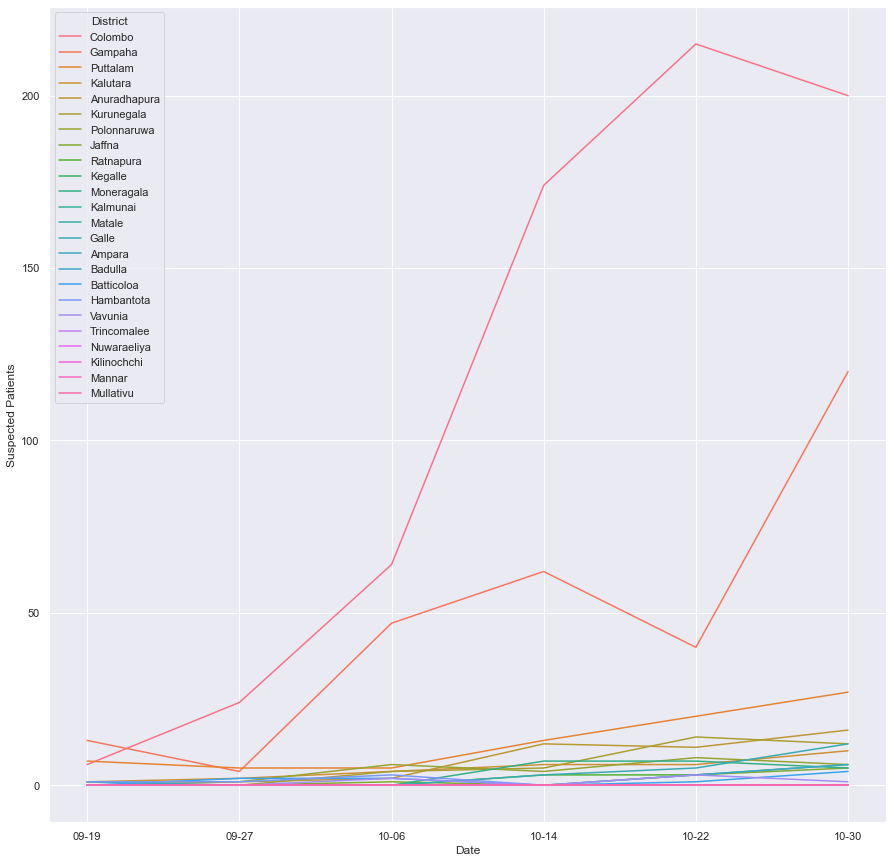

In [48]:
corona_df = corona_df.apply(lambda x: x.apply(int) if x.name in list(hospital_map.keys()) else x)
sns.lineplot(x='Date', y='Suspected Patients', hue='District', 
             data=pd.melt(day_sl_df.tail(50).loc[day_sl_df.tail(50).index%8==0],var_name='District',value_name='Suspected Patients', id_vars = ['Date'],value_vars=column_show))

## Additional Data

In [49]:
info_df = pd.read_csv(dataset_dir+'/info.csv')
info_df = info_df.dropna(how='any', axis=0)
info_df = info_df.applymap(float)
info_df

index  month  temp  humidity  sun_hours
0      1.0    0.0  27.0      77.0       8.79
1      2.0    0.0  27.0      75.0       9.46
2      3.0    0.0  26.5      78.0       8.88
3      4.0    0.0  27.0      79.0       8.50
4      5.0    0.0  26.0      76.0       9.18
..     ...    ...   ...       ...        ...
245    3.0    9.0  27.5      76.0       5.98
246    4.0    9.0  27.5      83.0       5.53
247    5.0    9.0  28.5      76.0       5.98
248    6.0    9.0  27.5      79.0       5.53
249    7.0    9.0  27.0      76.0       5.98

[232 rows x 5 columns]

<AxesSubplot:>

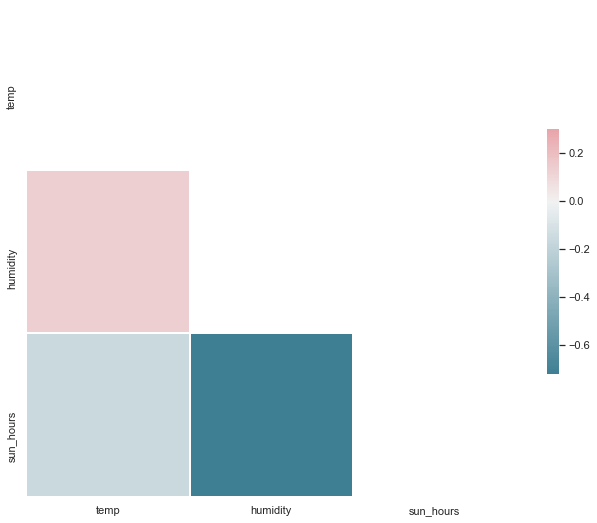

In [50]:
info_df_2 = info_df[['temp','humidity','sun_hours']]

#print(info_df_2)
corr = info_df_2.corr()
#print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Plotting time series data

In [55]:
timeseries_df = pd.read_csv(Directory+'/data/main_data/final.csv')
timeseries_df.head(10)

index formal_date  quarter  date  day_of_week  month  Suspected_Local  \
0      1  2020-03-31        1    31            1      3               41   
1     25  2020-03-31        1    31            1      3                0   
2     24  2020-03-31        1    31            1      3                0   
3     23  2020-03-31        1    31            1      3                0   
4     22  2020-03-31        1    31            1      3                0   
5     21  2020-03-31        1    31            1      3                0   
6     20  2020-03-31        1    31            1      3                3   
7     18  2020-03-31        1    31            1      3                0   
8     17  2020-03-31        1    31            1      3                2   
9     16  2020-03-31        1    31            1      3                1   

   Suspected_Foreign  temp  humidity  sun_hours  province  \
0                  1  28.5      81.0       7.15         1   
1                  0  30.0      78.0       6.15         9   
2                  0  29.5      82.0       5.74         9   
3                  0  30.0      81.0       4.58         9   
4                  0  31.0      81.0       4.87         9   
5                  0  30.0      82.0       5.06         9   
6                  0  30.0      82.0       5.15         8   
7                  0  29.0      75.0       7.95         7   
8                  0  29.0      73.0       8.70         7   
9                  0  29.5      71.0       8.45         6   

   neir_infected_cases  locked_percn  TotalInfected  
0                   34           1.0             11  
1                    1           1.0              0  
2                    1           1.0              0  
3                    0           1.0              0  
4                    1           1.0              0  
5                    0           1.0              0  
6                    3           1.0              0  
7                   16           1.0              1  
8                   20           1.0              1  
9                    1           1.0              1

In [56]:
len(timeseries_df.index)

5250